In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [5]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

In [6]:
for i in range(1,6):
    locals()['df'+str(i)] = pd.read_csv(str(i)+'.csv')

In [7]:
#將所有格子分成五個不同的測試集
def split():
    for i in range(1,6):
        locals()['df'+str(i)] = pd.read_csv(str(i)+'.csv')
    
    da = df1.index
    for i in range(5,1,-1):
        X_train,X_test,y_train,y_test = train_test_split(da,da,test_size=1/i,random_state=0)
        if i == 5:
            test1 = X_test.tolist()
            test1.sort()
        if i == 4:
            test2 = X_test.tolist()
            test2.sort()
        if i == 3:
            test3 = X_test.tolist()
            test3.sort()
        if i == 2:
            test4 = X_test.tolist()
            test4.sort()
            test5 = X_train.tolist()
            test5.sort()
        da = X_train 
        
        
    return test1,test2,test3,test4,test5

In [8]:
def make(ls):
    # split data
    df = pd.read_csv('1.csv')
    df = df.drop(index=ls,axis=1)
    X_train,X_va,y_train,y_va = train_test_split(df.index,df.index,test_size=0.2,random_state=0)
    train = X_train.tolist()
    train.sort() #train index list
    
    validation = X_va.tolist()
    validation.sort() #validation index list

    
    # make training data
    for i in range(1,5):
        locals()['df'+str(i)] = pd.read_csv(str(i)+'.csv')
        locals()['df'+str(i)] = locals()['df'+str(i)].loc[train,:]        
    traindf = pd.concat([locals()['df'+str(1)],locals()['df'+str(2)],locals()['df'+str(3)],locals()['df'+str(4)]],axis=0)
    
    
    #make validation data
    for i in range(1,5):
        locals()['df'+str(i)] = pd.read_csv(str(i)+'.csv')
        locals()['df'+str(i)] = locals()['df'+str(i)].loc[validation,:]
    vadf = pd.concat([locals()['df'+str(1)],locals()['df'+str(2)],locals()['df'+str(3)],locals()['df'+str(4)]],axis=0)
    
    
    #make testing data
    df5 = pd.read_csv('5.csv')
    testdf = df5.loc[ls,:]
    
    return traindf,vadf,testdf

In [9]:
t1,t2,t3,t4,t5 = split()

In [10]:
for i in range(1,6):
    locals()['train'+str(i)],locals()['va'+str(i)],locals()['test'+str(i)] = make(locals()['t'+str(i)])

In [11]:
train1,va1,test1 = make(t1)

In [12]:
class mydata(Dataset):
    def __init__(self,df): # get data and label
        self.x = df.drop(['bank','college'],axis=1).values
        self.y = df['bank'].values
        
    def __getitem__(self,index): # get index
        
        return self.x[index],self.y[index]
        
    def __len__(self): # get length
        
        return len(self.y)

[1/300] loss: 4.7893323       9.3173965
[2/300] loss: 4.0962412       7.1405286
[3/300] loss: 3.3258145       6.0666922
[4/300] loss: 2.7263314       5.03038
[5/300] loss: 2.3264445       4.4290941
[6/300] loss: 2.060235       4.0030307
[7/300] loss: 2.0545049       3.7418254
[8/300] loss: 1.8809334       3.7168601
[9/300] loss: 1.8134099       3.8035957
[10/300] loss: 1.7875224       3.3715631
[11/300] loss: 1.7411293       3.351657
[12/300] loss: 1.7115687       3.5559184
[13/300] loss: 1.6868716       3.2118302
[14/300] loss: 1.6054712       3.2269993
[15/300] loss: 1.6061873       3.1348361
[16/300] loss: 1.5657464       3.5551848
[17/300] loss: 1.5533489       3.1353001
[18/300] loss: 1.5680978       3.0946318
[19/300] loss: 1.5224957       2.8742121
[20/300] loss: 1.5258409       2.8116968
[21/300] loss: 1.550076       2.9575394
[22/300] loss: 1.4450264       2.7457151
[23/300] loss: 1.47963       3.0821713
[24/300] loss: 1.5898745       3.3632964
[25/300] loss: 1.4629579       2

[197/300] loss: 0.60659094       2.0229152
[198/300] loss: 0.62778556       2.2014319
[199/300] loss: 0.57235858       2.4356185
[200/300] loss: 0.59719113       2.0656155
[201/300] loss: 0.60539888       2.170992
[202/300] loss: 0.55287476       2.0133686
[203/300] loss: 0.62486766       2.6540652
[204/300] loss: 0.61493351       2.2730177
[205/300] loss: 0.565641       2.4359297
[206/300] loss: 0.6743592       2.1211252
[207/300] loss: 0.55023731       2.15614
[208/300] loss: 0.78432236       2.3404001
[209/300] loss: 0.60715901       2.2070365
[210/300] loss: 0.54526974       2.3166381
[211/300] loss: 0.65177279       2.1952941
[212/300] loss: 0.558951       2.4714622
[213/300] loss: 0.60920385       2.3299017
[214/300] loss: 0.55461041       2.306899
[215/300] loss: 0.55280646       2.3551354
[216/300] loss: 0.59172107       2.501604
[217/300] loss: 0.51320726       2.3406857
[218/300] loss: 0.52885655       2.1344745
[219/300] loss: 0.55943521       2.424197
[220/300] loss: 0.5410

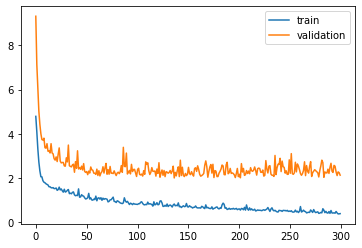

In [13]:
class dnn(nn.Module):
    def __init__(self):
        super(dnn,self).__init__()
        self.hid1 = nn.Linear(17, 16)  
        self.hid2 = nn.Linear(16, 16)
        self.hid3 = nn.Linear(16, 8)
        self.hid4 = nn.Linear(8, 8)
        self.hid5 = nn.Linear(8, 4)
        self.oupt = nn.Linear(4, 1)
        self.double()

    def forward(self,x):
        z = F.relu(self.hid1(x))
        z = F.relu(self.hid2(z))
        z = F.relu(self.hid3(z))
        z = F.relu(self.hid4(z))
        z = F.relu(self.hid5(z))
        z = self.oupt(z)  
        return z
    
def train( model, epochs, optimizer, loss_function, train_loader, valid_loader):
    tl = []
    vl = []
    # Early stopping
    the_last_loss = 100
    patience = 2
    trigger_times = 0
    
    for epoch in range(1, epochs+1):
        model.train()
        
        #print(model.training)
        los = 0
        for times, (f,l) in enumerate(train_loader):
            

            # Zero the gradients
            optimizer.zero_grad()

            # Forward and backward propagation
            outputs = model(f)
            l = l.unsqueeze(1)
            loss = loss_function(outputs, l)
            los += loss
            loss.backward()
            optimizer.step()
        
        
        
        
            model.eval()
            valid_loss = 0
            for i,(data, target) in enumerate(valid_loader):
                
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                target = target.unsqueeze(1)
                # calculate the batch loss
                lo = loss_function(output, target)
                # update average validation loss 
                valid_loss += lo
  

            
            
            # Show progress
            #if times % 100 == 0 or times == len(train_loader):
                
        print('[{}/{}] loss: {:.8}       {:.8}'.format(epoch, epochs, float(los/times),float(valid_loss/i)))
        tl.append(float(los/times))
        vl.append(float(valid_loss/i))
    return tl,vl,model


if __name__ == '__main__':
    name = df1.columns.tolist()
    for n in name:
        train1[n] = train1[n].astype(float)
        va1[n] = va1[n].astype(float)

    data = mydata(train1)
    train_loader = DataLoader(dataset=data,batch_size=64,shuffle=True)

    data = mydata(va1)
    valid_loader = DataLoader(dataset=data,batch_size=64,shuffle=True)

    dnn = dnn()
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(dnn.parameters(), lr=1e-3)

    tl,vl,model = train( dnn, 300, optimizer, loss_function, train_loader, valid_loader)
    plt.plot(tl,label='train')
    plt.plot(vl,label='validation')
    plt.legend()

In [14]:
class dnn(nn.Module):
    def __init__(self):
        super(dnn,self).__init__()
        self.hid1 = nn.Linear(17, 16)  
        self.hid2 = nn.Linear(16, 16)
        self.hid3 = nn.Linear(16, 8)
        self.hid4 = nn.Linear(8, 8)
        self.hid5 = nn.Linear(8, 8)
        self.hid6 = nn.Linear(8, 8)
        self.hid7 = nn.Linear(8, 8)
        self.hid8 = nn.Linear(8, 8)
        self.hid11 = nn.Linear(8, 8)
        self.hid12 = nn.Linear(8, 4)
        self.oupt = nn.Linear(4, 1)
        self.double()

    def forward(self,x):
        z = F.relu(self.hid1(x))
        z = F.relu(self.hid2(z))
        z = F.relu(self.hid3(z))
        z = F.relu(self.hid4(z))
        z = F.relu(self.hid5(z))
        z = F.relu(self.hid6(z))
        z = F.relu(self.hid7(z))
        z = F.relu(self.hid8(z))
        z = F.relu(self.hid11(z))
        z = F.relu(self.hid12(z))
        z = self.oupt(z)  
        return z

In [15]:
def train( model, epochs, optimizer, loss_function, train_loader, valid_loader):
    tl = []
    vl = []
    # Early stopping
    the_last_loss = 100
    patience = 2
    trigger_times = 0
    
    for epoch in range(1, epochs+1):
        model.train()
        
        #print(model.training)
        los = 0
        for times, (f,l) in enumerate(train_loader):
            

            # Zero the gradients
            optimizer.zero_grad()

            # Forward and backward propagation
            outputs = model(f)
            l = l.unsqueeze(1)
            loss = loss_function(outputs, l)
            los += loss
            loss.backward()
            optimizer.step()
        
        
        
        
            model.eval()
            valid_loss = 0
            for i,(data, target) in enumerate(valid_loader):
                
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                target = target.unsqueeze(1)
                # calculate the batch loss
                lo = loss_function(output, target)
                # update average validation loss 
                valid_loss += lo
  

            
            
            # Show progress
            #if times % 100 == 0 or times == len(train_loader):
                
        print('[{}/{}] loss: {:.8}       {:.8}'.format(epoch, epochs, float(los/times),float(valid_loss/i)))
        tl.append(float(los/times))
        vl.append(float(valid_loss/i))
    return tl,vl,model

[1/1000] loss: 971.82458       964.8571
[2/1000] loss: 926.54753       893.90304
[3/1000] loss: 883.98267       852.21566
[4/1000] loss: 843.87361       830.29914
[5/1000] loss: 803.57265       766.61505
[6/1000] loss: 768.04964       745.62244
[7/1000] loss: 733.41667       703.66739
[8/1000] loss: 696.5217       694.57944
[9/1000] loss: 664.36235       659.7464
[10/1000] loss: 633.67733       604.32963
[11/1000] loss: 601.74246       592.24944
[12/1000] loss: 572.37536       547.73101
[13/1000] loss: 543.45196       521.57901
[14/1000] loss: 516.0671       525.87901
[15/1000] loss: 489.17592       484.2266
[16/1000] loss: 462.71712       475.61567
[17/1000] loss: 435.85886       422.65702
[18/1000] loss: 410.65174       405.51724
[19/1000] loss: 385.66583       384.36806
[20/1000] loss: 360.2811       356.68682
[21/1000] loss: 336.11154       348.73676
[22/1000] loss: 312.79063       313.5574
[23/1000] loss: 290.81858       287.48395
[24/1000] loss: 270.43036       274.16266
[25/1000

[196/1000] loss: 3.5435485       7.1106683
[197/1000] loss: 3.5364219       6.8588297
[198/1000] loss: 3.5381177       8.9550452
[199/1000] loss: 3.5346552       6.8240727
[200/1000] loss: 3.5217407       7.1049543
[201/1000] loss: 3.5243512       6.810643
[202/1000] loss: 3.5211361       6.8273322
[203/1000] loss: 3.5187434       7.3574011
[204/1000] loss: 3.5146871       6.7805717
[205/1000] loss: 3.5392854       6.8075629
[206/1000] loss: 3.4997225       7.0728681
[207/1000] loss: 3.5212465       7.0482086
[208/1000] loss: 3.5002189       7.3617537
[209/1000] loss: 3.5109346       6.931252
[210/1000] loss: 3.4848007       6.7759831
[211/1000] loss: 3.4902636       7.3342137
[212/1000] loss: 3.4841602       7.0467719
[213/1000] loss: 3.4624988       7.2597145
[214/1000] loss: 3.4624598       6.7121978
[215/1000] loss: 3.448531       8.4676175
[216/1000] loss: 3.4542349       6.907138
[217/1000] loss: 3.4615812       6.7027742
[218/1000] loss: 3.4338467       6.8689722
[219/1000] loss

[388/1000] loss: 2.5550925       5.3892206
[389/1000] loss: 2.5317115       5.2430064
[390/1000] loss: 2.5336466       5.2509426
[391/1000] loss: 2.5456079       5.6056908
[392/1000] loss: 2.54515       5.4408692
[393/1000] loss: 2.5092395       5.4516126
[394/1000] loss: 2.5085259       5.3378981
[395/1000] loss: 2.5006578       5.3873445
[396/1000] loss: 2.4923423       5.3075988
[397/1000] loss: 2.4908376       5.1973592
[398/1000] loss: 2.4819206       5.1725991
[399/1000] loss: 2.485943       5.4211508
[400/1000] loss: 2.4750542       5.4115548
[401/1000] loss: 2.467896       5.3015356
[402/1000] loss: 2.476533       5.8657438
[403/1000] loss: 2.4877145       5.8080038
[404/1000] loss: 2.4586632       5.1268328
[405/1000] loss: 2.4567414       5.7946601
[406/1000] loss: 2.4474217       5.1266799
[407/1000] loss: 2.4433827       5.3045373
[408/1000] loss: 2.4349745       5.3718499
[409/1000] loss: 2.4480711       5.2132917
[410/1000] loss: 2.433877       5.4743433
[411/1000] loss: 

[580/1000] loss: 1.9173523       4.2346006
[581/1000] loss: 1.9084532       4.2297412
[582/1000] loss: 1.9240413       5.1417726
[583/1000] loss: 1.903066       5.129113
[584/1000] loss: 1.914882       4.2026922
[585/1000] loss: 1.9018609       4.0806609
[586/1000] loss: 1.9038187       4.1176462
[587/1000] loss: 1.8952965       4.1351389
[588/1000] loss: 1.8930425       4.0590771
[589/1000] loss: 1.8953364       4.0638969
[590/1000] loss: 1.887349       4.1061004
[591/1000] loss: 1.8864683       4.0615641
[592/1000] loss: 1.8867509       4.1257322
[593/1000] loss: 1.8909446       4.0668471
[594/1000] loss: 1.888606       4.4132655
[595/1000] loss: 1.8784264       4.0694171
[596/1000] loss: 1.8945558       4.5039503
[597/1000] loss: 1.8824249       4.0767717
[598/1000] loss: 1.8739983       4.1854489
[599/1000] loss: 1.8802975       4.4122376
[600/1000] loss: 1.8769776       4.254776
[601/1000] loss: 1.8743211       4.0166825
[602/1000] loss: 1.8650032       4.1502162
[603/1000] loss: 

[772/1000] loss: 1.7093382       3.6368157
[773/1000] loss: 1.6980958       3.7392171
[774/1000] loss: 1.7018216       3.6430777
[775/1000] loss: 1.7083944       4.5147977
[776/1000] loss: 1.696232       4.5232166
[777/1000] loss: 1.7043466       4.0647368
[778/1000] loss: 1.7118029       3.5963808
[779/1000] loss: 1.6962261       3.7319357
[780/1000] loss: 1.6987367       4.5607776
[781/1000] loss: 1.6959512       3.6068077
[782/1000] loss: 1.6959204       3.7204648
[783/1000] loss: 1.6900668       3.7618186
[784/1000] loss: 1.6921925       3.6053941
[785/1000] loss: 1.6922716       3.7863453
[786/1000] loss: 1.6966253       3.6479717
[787/1000] loss: 1.6920838       3.6186504
[788/1000] loss: 1.6919455       3.6591345
[789/1000] loss: 1.6909543       3.7404797
[790/1000] loss: 1.7015089       3.57733
[791/1000] loss: 1.6883893       3.6355292
[792/1000] loss: 1.6853928       3.8009641
[793/1000] loss: 1.6861494       3.5935337
[794/1000] loss: 1.6876475       3.6586949
[795/1000] los

[964/1000] loss: 1.5895089       3.5433431
[965/1000] loss: 1.5964204       3.5256414
[966/1000] loss: 1.6052993       3.3807446
[967/1000] loss: 1.5995809       3.4080767
[968/1000] loss: 1.5907196       3.5161226
[969/1000] loss: 1.5902881       3.3987753
[970/1000] loss: 1.5846556       3.3855655
[971/1000] loss: 1.5934847       3.7432791
[972/1000] loss: 1.5885516       3.3784755
[973/1000] loss: 1.5953749       3.333149
[974/1000] loss: 1.5888943       3.339408
[975/1000] loss: 1.5848072       3.3992096
[976/1000] loss: 1.582015       4.1923646
[977/1000] loss: 1.5858857       3.352651
[978/1000] loss: 1.6003589       3.4428353
[979/1000] loss: 1.5853155       3.3837726
[980/1000] loss: 1.5833794       4.2931161
[981/1000] loss: 1.585331       3.3792977
[982/1000] loss: 1.5934808       3.3281297
[983/1000] loss: 1.5798179       3.3926437
[984/1000] loss: 1.577785       3.3168157
[985/1000] loss: 1.5800646       3.4005909
[986/1000] loss: 1.5816658       4.2016734
[987/1000] loss: 

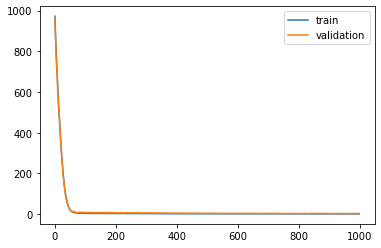

In [18]:
name = df1.columns.tolist()
for n in name:
    train1[n] = train1[n].astype(float)
    va1[n] = va1[n].astype(float)

data = mydata(train1)
train_loader = DataLoader(dataset=data,batch_size=64,shuffle=True)

data = mydata(va1)
valid_loader = DataLoader(dataset=data,batch_size=64,shuffle=True)

dnn = dnn()
loss_function = nn.MSELoss()
optimizer = optim.Adam(dnn.parameters(), lr=1e-5)
    
tl,vl,model = train( dnn, 100, optimizer, loss_function, train_loader, valid_loader)
plt.plot(tl,label='train')
plt.plot(vl,label='validation')
plt.legend()

In [17]:
class dnn(nn.Module):
    def __init__(self):
        super(dnn,self).__init__()
        self.hid1 = nn.Linear(17, 17)  
        self.hid2 = nn.Linear(17, 17)
        #self.hid3 = nn.Linear(8, 8)
        #self.hid4 = nn.Linear(8, 17)
        self.hid5 = nn.Linear(17, 17)
        self.oupt = nn.Linear(17, 1)
        self.double()

    def forward(self,x):
        z = F.relu(self.hid1(x))
        z = F.relu(self.hid2(z))
        #z = F.relu(self.hid3(z))
        #z = F.relu(self.hid4(z))
        z = F.relu(self.hid5(z))
        z = self.oupt(z)  
        return z